<a href="https://colab.research.google.com/github/shravaniloke/Car-Price-Prediction/blob/main/CarPricePredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 Car Price Prediction using Machine Learning


In [ ]:
#dataset link
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

100%|██████████| 292k/292k [00:00<00:00, 66.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib

Data Collection and Processing

In [ ]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/Car details v3.csv')

In [ ]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
# checking the number of rows and columns
car_dataset.shape

(8128, 13)

In [ ]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
# checking the number of missing values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [ ]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())


# encoding "Fuel_Type" Column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2, 'LPG':3}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1, 'Trustmark Dealer':2}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64


/tmp/ipython-input-8-1775945186.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2, 'LPG':3}},inplace=True)
/tmp/ipython-input-8-1775945186.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1, 'Trustmark Dealer':2}},inplace=True)
/tmp/ipython-input-8-1775945186.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly c

Encoding the Categorical Data

In [ ]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,0,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,0,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,1,0,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,0,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,1,0,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Splitting the data and Target

In [ ]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [ ]:
print(X)

      year  km_driven  fuel  seller_type  transmission                 owner  \
0     2014     145500     1            1             0           First Owner   
1     2014     120000     1            1             0          Second Owner   
2     2006     140000     0            1             0           Third Owner   
3     2010     127000     1            1             0           First Owner   
4     2007     120000     0            1             0           First Owner   
...    ...        ...   ...          ...           ...                   ...   
8123  2013     110000     0            1             0           First Owner   
8124  2007     119000     1            1             0  Fourth & Above Owner   
8125  2009     120000     1            1             0           First Owner   
8126  2013      25000     1            1             0           First Owner   
8127  2013      25000     1            1             0           First Owner   

         mileage   engine   max_power  

In [ ]:
print(Y)

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64


Splitting Training and Test data




In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1.   Linear Regression


In [ ]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [ ]:
# Convert all columns to numeric, errors='coerce' will replace invalid values with NaN
# Then, fill NaN values with 0
for column in car_dataset.columns:
    car_dataset[column] = pd.to_numeric(car_dataset[column], errors='coerce')
    car_dataset[column] = car_dataset[column].fillna(0)

# Splitting the data and Target
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [ ]:
# Now proceed with splitting into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# loading the linear regression model
lin_reg_model = LinearRegression()

# Now you can fit the model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.48578870725076184


Visualize the actual prices and Predicted prices

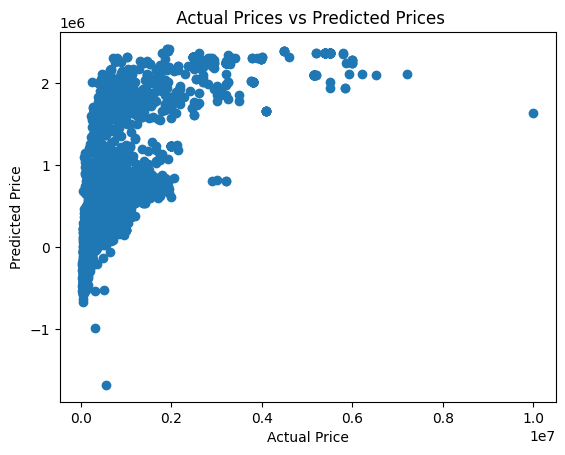

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4953639118176266


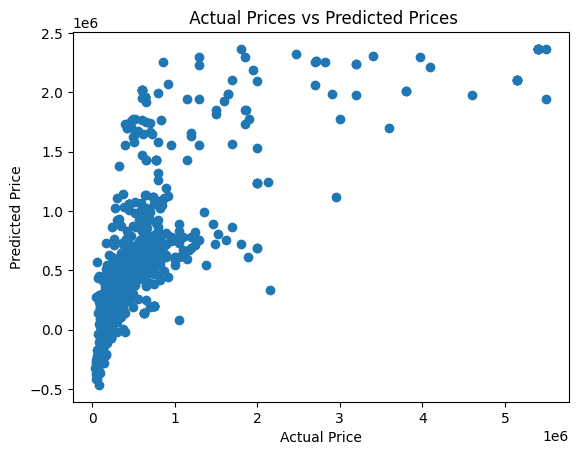

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


2.  Lasso Regression



In [ ]:
from sklearn.linear_model import Lasso

# loading the linear regression model
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [ ]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4857887072254117


**Visualize** the actual prices and Predicted prices

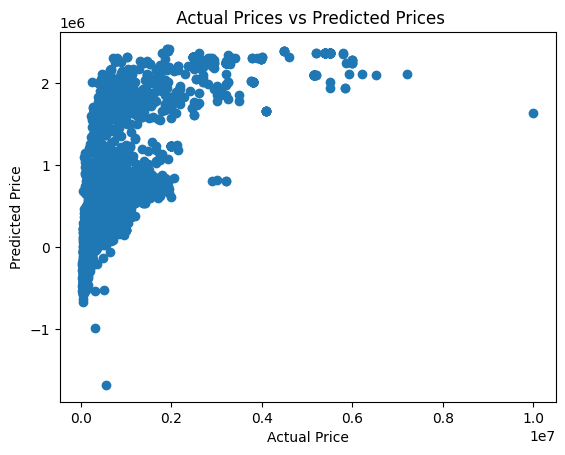

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.49536368629567185


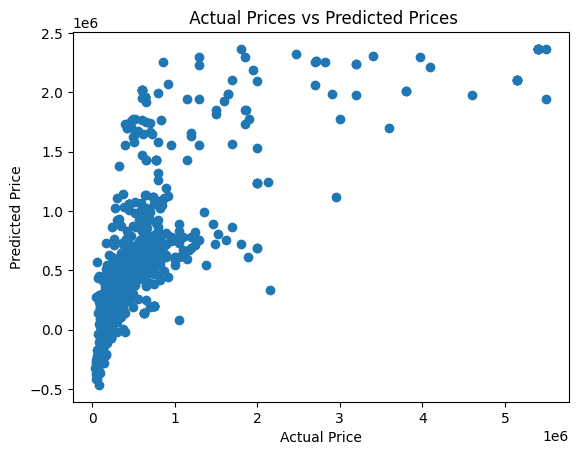

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

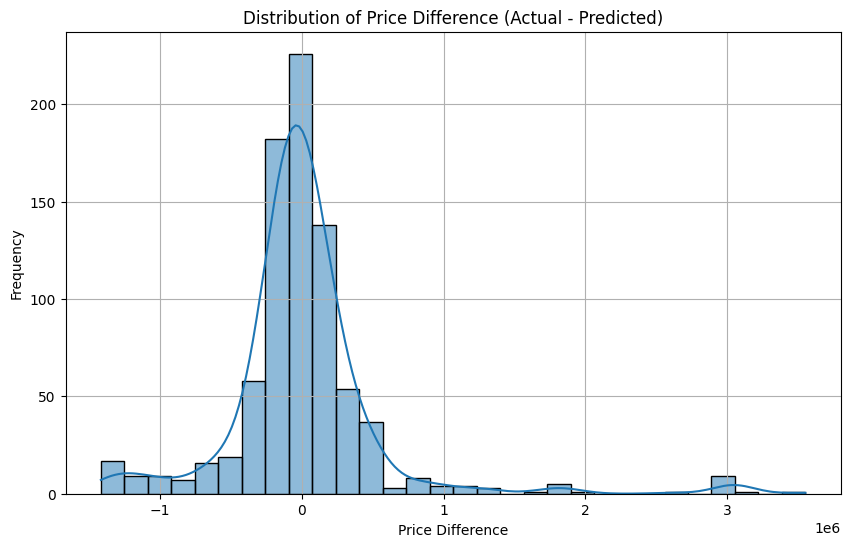

In [ ]:
# After predicting on the test data:
test_data_prediction = lass_reg_model.predict(X_test)

# Calculate the difference between actual and predicted prices
price_difference = Y_test - test_data_prediction

# Create a distribution plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(price_difference, kde=True, bins=30)  # Adjust bins as needed
plt.title("Distribution of Price Difference (Actual - Predicted)")
plt.xlabel("Price Difference")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# Step 3: Basic Data Cleaning (example)
car_dataset.dropna(inplace=True)

# Ensure the features match the columns used in preprocessing
features = ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'mileage', 'engine']  # Added 'seller_type'
target = 'selling_price'

X = car_dataset[features]
y = car_dataset[target]

# Step 4: Preprocessing
# Updated categorical_cols and numerical_cols to match the selected features
categorical_cols = ['fuel', 'seller_type', 'transmission']  # Updated to use existing columns
numerical_cols = ['year', 'km_driven', 'engine', 'mileage']  # Updated to use existing columns


preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols), # sparse=False for RandomForestRegressor
    ('num', StandardScaler(), numerical_cols)
])

# Step 5: Create Pipeline and Train Model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['fuel', 'seller_type',
                                                   'transmission']),
                                                 ('num', StandardScaler(),
                                                  ['year', 'km_driven',
                                                   'engine', 'mileage'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# Step 7: Save the model
joblib.dump(model, 'car_price_model.pkl')

['car_price_model.pkl']

In [ ]:
features = ['year', 'fuel', 'transmission', 'km_driven', 'engine', 'name']  # Assuming 'name' contains brand
target = 'selling_price'

In [ ]:
# def predict_price():
#     print("Enter car details to predict price:\n")
#     name = input("Car Name (e.g., Honda City): ") # This feature is likely not used in training
#     year = int(input("Year of Manufacture: "))
#     fuel = input("Fuel Type (Petrol/Diesel/CNG): ")
#     trans = input("Transmission (Manual/Automatic): ")
#     kms = int(input("Kilometers Driven: "))
#     engine = int(input("Engine (CC): "))
#     mileage = float(input("Mileage (kmpl): "))  # Get mileage from user
#     seller_type = input("Seller Type (Dealer/Individual/Trustmark Dealer): ") # Get seller_type from user

#     input_df = pd.DataFrame([{
#         'name': name,  # You might need to remove this if 'name' is not a feature in your model
#         'year': year,
#         'fuel': fuel,
#         'transmission': trans,
#         'km_driven': kms,
#         'engine': engine,
#         'mileage': mileage,  # Add mileage to the DataFrame
#         'seller_type': seller_type  # Add seller_type to the DataFrame
#     }])

#     # Apply same preprocessing (encoding) as during training
#     # ... (code to encode fuel, transmission, seller_type) ...
#     # Assuming encoding is the same as earlier in the notebook:
#     input_df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2, 'LPG':3}},inplace=True)
#     input_df.replace({'seller_type':{'Dealer':0,'Individual':1, 'Trustmark Dealer':2}},inplace=True)
#     input_df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)


#     # Now, select only the features that the model expects
#     input_df = input_df[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'mileage', 'engine']]


#     # Apply same preprocessing and prediction
#     result = loaded_model.predict(input_df)
#     print(f"\nEstimated Car Price: ₹ {result[0]:,.2f}")
# predict_price()

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('car_price_model.pkl')

# Prediction function based on your logic
def predict_car_price(year, kms, fuel, seller_type, transmission, mileage, engine):
    input_df = pd.DataFrame([{
        'year': year,
        'km_driven': kms,
        'fuel': fuel,
        'seller_type': seller_type,
        'transmission': transmission,
        'mileage': mileage,
        'engine': engine
    }])

    # Manual encoding (same as your training logic)
    input_df.replace({'fuel': {'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3}}, inplace=True)
    input_df.replace({'seller_type': {'Dealer': 0, 'Individual': 1, 'Trustmark Dealer': 2}}, inplace=True)
    input_df.replace({'transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

    # Predict
    result = model.predict(input_df)
    return f"Estimated Car Price: ₹ {result[0]:,.2f}"

# Gradio Interface
interface = gr.Interface(
    fn=predict_car_price,
    inputs=[
        gr.Number(label="Year of Manufacture"),
        gr.Number(label="Kilometers Driven"),
        gr.Dropdown(["Petrol", "Diesel", "CNG", "LPG"], label="Fuel Type"),
        gr.Dropdown(["Dealer", "Individual", "Trustmark Dealer"], label="Seller Type"),
        gr.Dropdown(["Manual", "Automatic"], label="Transmission Type"),
        gr.Number(label="Mileage (kmpl)"),
        gr.Number(label="Engine CC")
    ],
    outputs="text",
    title="Car Price Prediction App",
    description="Enter car specifications to get the estimated price"
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6fff8ad41fc8ba8874.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
